
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2025**

---




# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.power import tt_ind_solve_power

#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.0,5800000.0,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.0
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.0,10200000.0,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.0
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.0,3137662.0,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.0


In [4]:
df.profile_gender.unique()

array(['Hombre Cis', 'Mujer Cis', 'No binarie', 'Prefiero no decir', nan,
       'Trans', 'Queer', 'Lesbiana', 'Agénero'], dtype=object)

In [5]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Hombre Cis': 'Varón cis','Mujer Cis': 'Mujer cis','Queer':'Diversidades','Trans':'Diversidades','Queer':'Diversidades','Lesbiana':'Diversidades','Agénero':'Diversidades'}).fillna(False)

In [6]:
alpha = 0.05

In [7]:
is_man   = df.profile_g == 'Varón cis'
is_woman = df.profile_g == 'Mujer cis'

In [8]:
groupA  = df[(15000000>df.salary_monthly_NETO)&(df.salary_monthly_NETO > 100000) & is_man].salary_monthly_NETO
groupB  = df[(df.salary_monthly_NETO > 100000) & is_woman].salary_monthly_NETO

In [9]:
print(f"Mean: {groupA.mean()}")
print(f"Median: {groupA.median()}")
print(f"Standard Deviation: {groupA.std()}")

Mean: 2403162.4648686917
Median: 2000000.0
Standard Deviation: 1606418.565282235


In [10]:
print(f"Mean: {groupB.mean()}")
print(f"Median: {groupB.median()}")
print(f"Standard Deviation: {groupB.std()}")

Mean: 1926464.3164589824
Median: 1660669.0
Standard Deviation: 1246694.955339217


Text(0.5, 0, 'Salary')

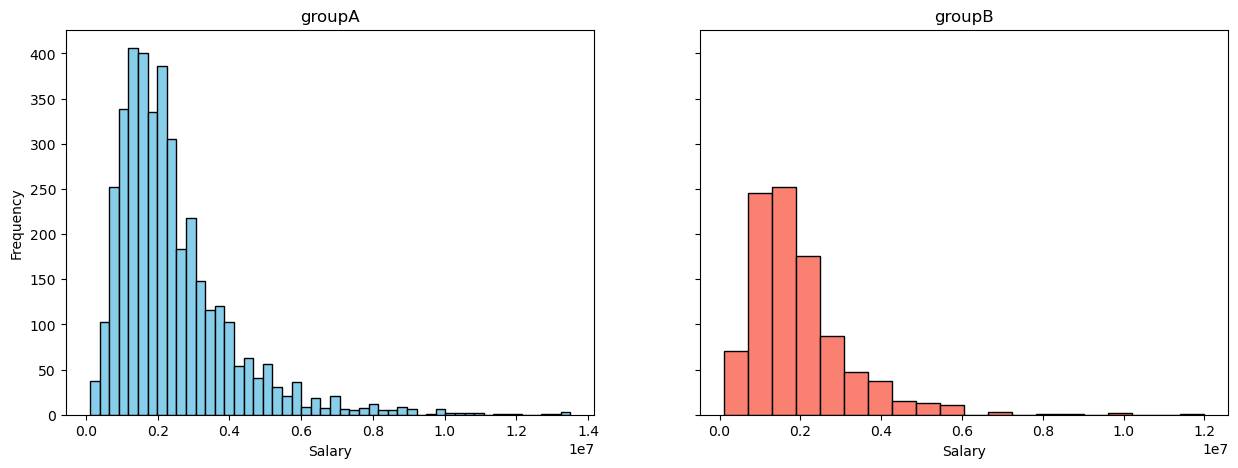

In [11]:
# Create the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  # 1 row, 3 columns

# Plot each group on a separate subplot
axes[0].hist(groupA, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('groupA')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')

axes[1].hist(groupB, bins=20, color='salmon', edgecolor='black')
axes[1].set_title('groupB')
axes[1].set_xlabel('Salary')

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres y la media del salario Neto para mujeres (diferencia de las medias entre el grupoA y grupoB).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis para diferencia de medias?

En primer lugar calculamos la estimación puntual como la resta entre las medias del Salario Neto para hombres (groupA) 
y para mujeres (groupB) :

In [12]:
## estimación puntual
diff = groupA.mean() - groupB.mean()
print(f"Diferencia de medias: {diff}")

Diferencia de medias: 476698.14840970933


Luego el intervalo de confianza de nivel (1-$\alpha$) con $\alpha$ = 0.05 con el t de Welch, donde el tamaño y las varianzas
entre las muestras son distintas. Esto se puede ver por ejemplo, cuando calculamos las desviaciones standard (1606418.5652822386 para el grupo A y  1246694.9553392164 para el grupo B) y la cantidad de mujeres y hombres (963 Y 3884, respectivamente)

In [13]:
# Tamaños muestrales
n1, n2 = len(groupA), len(groupB)
print("Cantidad de hombres=", n1)
print("Cantidad de mujeres=", n2)

Cantidad de hombres= 3884
Cantidad de mujeres= 963


In [14]:
# Desvíación estándar
s1, s2 = groupA.std(), groupB.std()
print("Desvíación estándar para los salarios netos de hombres =",s1)
print("Desvíación estándar para los salarios netos de mujeres =",s2)

Desvíación estándar para los salarios netos de hombres = 1606418.565282235
Desvíación estándar para los salarios netos de mujeres = 1246694.955339217


In [15]:
### Intervalo de confianza de nivel (1-alpha) para la resta
### entre la media del salario Neto para Hombres y la media del salario Neto para mujeres

###################### Error estándar de cada grupo (s_Xi)
s_X1 = s1 / np.sqrt(n1)
s_X2 = s2 / np.sqrt(n2)

######################Error estándar combinado
s_diff = np.sqrt(s_X1**2 + s_X2**2)

###################### Grados de libertad (Welch-Satterthwaite)
# Numerador
df_num = ( (s1**2 / n1) + (s2**2 / n2) )**2

# Denominador 
term1 = (s1**4) / (n1**2 * (n1 - 1))
term2 = (s2**4) / (n2**2 * (n2 - 1))
df_den = term1 + term2

# Grados de libertad aproximados
df = df_num / df_den

###################### Valor crítico de t para el nivel de confianza deseado
t_critical = stats.t.ppf(1 - alpha/2, df)

###################### Construcción del intervalo de confianza
ci_lower = diff - (t_critical * s_diff)
ci_upper = diff + (t_critical * s_diff)

print(f"Grados de libertad (aprox.): {df}")
print(f"Valor crítico t: {t_critical}")
print(f"Intervalo de confianza del {100*(1-alpha)}%: ({ci_lower}, {ci_upper})")

Grados de libertad (aprox.): 1839.826694806468
Valor crítico t: 1.961254218073162
Intervalo de confianza del 95.0%: (383082.8568695127, 570313.439949906)


El intervalo de confianza (IC) y el test de hipótesis para la diferencia de medias son dos herramientas estadísticas que, aunque se aplican de manera distinta, buscan responder la misma pregunta: si existe una diferencia estadísticamente significativa entre los promedios de dos poblaciones.

En el test de hipótesis, se formula como hipótesis nula (H$_0$) que no hay diferencia entre las medias poblacionales, es decir, que los salarios promedio de varones cis y mujeres cis son iguales (H$_0$: $\mu_1$ − $\mu_2$ = 0). La hipótesis alternativa H$_1$ plantea que las medias son distintas (H$_1$: $\mu_1$ − $\mu_2$ ≠ 0). A partir de los datos recolectados, se calcula un estadístico de prueba y su valor-p, que permite evaluar si la evidencia empírica es suficiente para rechazar la hipótesis nula con un nivel de significancia previamente definido ($\alpha$).

El intervalo de confianza, por su parte, proporciona un rango de valores plausibles para la verdadera diferencia de medias. Su interpretación es que, con un cierto nivel de confianza (por ejemplo, 95%), el intervalo obtenido contendrá la verdadera diferencia poblacional en un alto porcentaje de muestras tomadas de la misma población.

Ambos enfoques están relacionados:
* Si el valor 0 no está incluido en el intervalo de confianza, se rechaza la hipótesis nula y se concluye que existe evidencia estadística de una diferencia significativa entre los salarios promedio de ambos grupos.

* Si el valor 0 está incluido en el intervalo, no se rechaza H$_0$, lo que indica que no hay evidencia suficiente para afirmar una diferencia entre las medias.

El test de hipótesis lo hace mediante el valor-p y el intervalo de confianza a través de la inclusión o exclusión del valor nulo. Aunque sus enfoques son diferentes, se complementan para evaluar la significancia de la diferencia de medias de manera consistente.

## Ejercicio 2: Test de hipótesis


### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0: \mu_A - \mu_B = 0$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


## 2.1

Para contrastar si la distribución de los salarios es distinta entre los grupos A (hombres programadores) y B (mujeres programadoras), formulamos el test de hipótesis correspondiente a la comparación de medias de dos poblaciones independientes.

**Hipótesis Nula**

$$ H_0 : \mu_A = \mu_B \quad (\mu_A - \mu_B = 0)$$

Esto implica que, bajo la hipótesis nula, no existe diferencia en los salarios medios entre los grupos A y B.

**Hipótesis Alternativa**

$$ H_1 : \mu_A \neq \mu_B \quad (\mu_A - \mu_B \neq 0) $$

Esto plantea que los salarios medios entre ambos grupos son significativamente diferentes.

---

**Estadístico (Pivote)**

El estadístico de prueba es el **estadístico t para dos muestras independientes con varianzas distintas** (test de Welch), dado por:

$$ T = \frac{ \bar{X}_A - \bar{X}_B }{ \sqrt{ \frac{s_A^2}{n_A} + \frac{s_B^2}{n_B} } } $$

donde:  
– $ \bar{X}_A ,  \bar{X}_B $ son las medias muestrales de los salarios en cada grupo,  
– $ s_A^2 ,  s_B^2 $ son las varianzas muestrales,  
– $ n_A ,  n_B $ son los tamaños muestrales de cada grupo.

---

**Distribución bajo ( H$_0$ )**

Bajo la hipótesis nula ( H$_0$ = no existe diferencia real entre las medias poblacionales) y asumiendo que las varianzas poblacionales son **distintas**, el estadístico ( T ) se distribuye aproximadamente como una **t de Student** con grados de libertad estimados mediante la fórmula de **Welch-Satterthwaite**:

$$ df = \frac{ \left( \frac{s_A^2}{n_A} + \frac{s_B^2}{n_B} \right)^2 }{ \frac{ (s_A^2 / n_A)^2 }{n_A - 1} + \frac{ (s_B^2 / n_B)^2 }{n_B - 1} } $$

Por lo tanto, bajo ( $H_0$ ):

$$ T \sim t_{df} $$

donde **t** es la distribución t de Student con **df** grados de libertad.


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

1. Cálculo del p-valor y decisión sobre H$_0$

Dado que asumimos varianzas distintas entre los dos grupos (hombres programadores y mujeres programadoras), corresponde utilizar el test t de Welch, que ajusta automáticamente los grados de libertad.

En Python, con scipy, se puede calcular el estadístico t y el p-valor usando:

In [16]:
t_stat, p_value = stats.ttest_ind(groupA, groupB, equal_var=False)

print(f"Estadístico t: {t_stat:.4f}")
print(f"p valor: {p_value:.10f}")

Estadístico t: 9.9869
p valor: 0.0000000000


2. En este caso, se rechaza la hipótesis nula, dado que el p valor (p = $0.00$) obtenido es menor que el nivel de significancia establecido ($\alpha = 0.05$).

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

1.Primero calculamos el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.

In [17]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.8

In [18]:
# Para power = 0.8
n_0_8 = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.8, ratio=ratio)

# Para power = 0.9
n_0_9 = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.9, ratio=ratio)

# Para power = 0.95
n_0_95 = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.95, ratio=ratio)

print(f"Tamaño necesario de muestra para power=0.8: {n_0_8:.2f}")
print(f"Tamaño necesario de muestra para power=0.9: {n_0_9:.2f}")
print(f"Tamaño necesario de muestra para power=0.95: {n_0_95:.2f}")

Tamaño necesario de muestra para power=0.8: 271.75
Tamaño necesario de muestra para power=0.9: 363.27
Tamaño necesario de muestra para power=0.95: 448.89


2. El poder estadístico de un test mide la probabilidad de detectar una diferencia real entre los grupos si existe, evitando un error tipo II (no rechazar la hipótesis nula cuando esta es falsa). Un poder de 0.8 es generalmente suficiente, indicando un 80% de probabilidad de detectar una diferencia significativa si existe, pero valores de 0.9 o 0.95 proporcionan mayor confianza, aunque requieren muestras más grandes.

En este caso, el tamaño necesario de la muestra para un poder de 0.8 es de 271.75, para 0.9 es de 363.27 y para 0.95 es de 448.89. Sin embargo, la muestra con la que contamos tiene 963 mujeres, por lo que el tamaño de la muestra es más que suficiente para obtener un poder estadístico adecuado en cualquiera de los escenarios, garantizando la fiabilidad de los resultados.

Por lo tanto, no hay problemas con el tamaño de la muestra. En el contexto de un juicio penal por discriminación, como el de una empresa XX, un poder estadístico adecuado y un tamaño de muestra grande son fundamentales para garantizar que los resultados sean confiables y representativos, y en este caso, esos requisitos están cumplidos.

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave:
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle.
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


podríamos hacer:

1) grafico de barra--> cantidad de gente por lenguaje

2) gráfico de barra parecido a 
https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y